## VGG16


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
import keras
from keras import layers, applications, optimizers , callbacks
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout,ReLU,Add,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-07-09 05:09:53.140070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 05:09:53.140182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 05:09:53.264288: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv("/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/Training_set.csv")
df

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
4995,Image_4996.jpg,ORANGE TIP
4996,Image_4997.jpg,MONARCH
4997,Image_4998.jpg,GREY HAIRSTREAK
4998,Image_4999.jpg,MONARCH


In [3]:
len(df['label'].value_counts())

75

In [4]:
counts=df['label'].value_counts()
counts

label
MOURNING CLOAK     105
CRECENT             82
SLEEPY ORANGE       82
ORANGE TIP          81
ADONIS              78
                  ... 
WOOD SATYR          56
GOLD BANDED         54
MALACHITE           53
ZEBRA LONG WING     52
CRIMSON PATCH       47
Name: count, Length: 75, dtype: int64

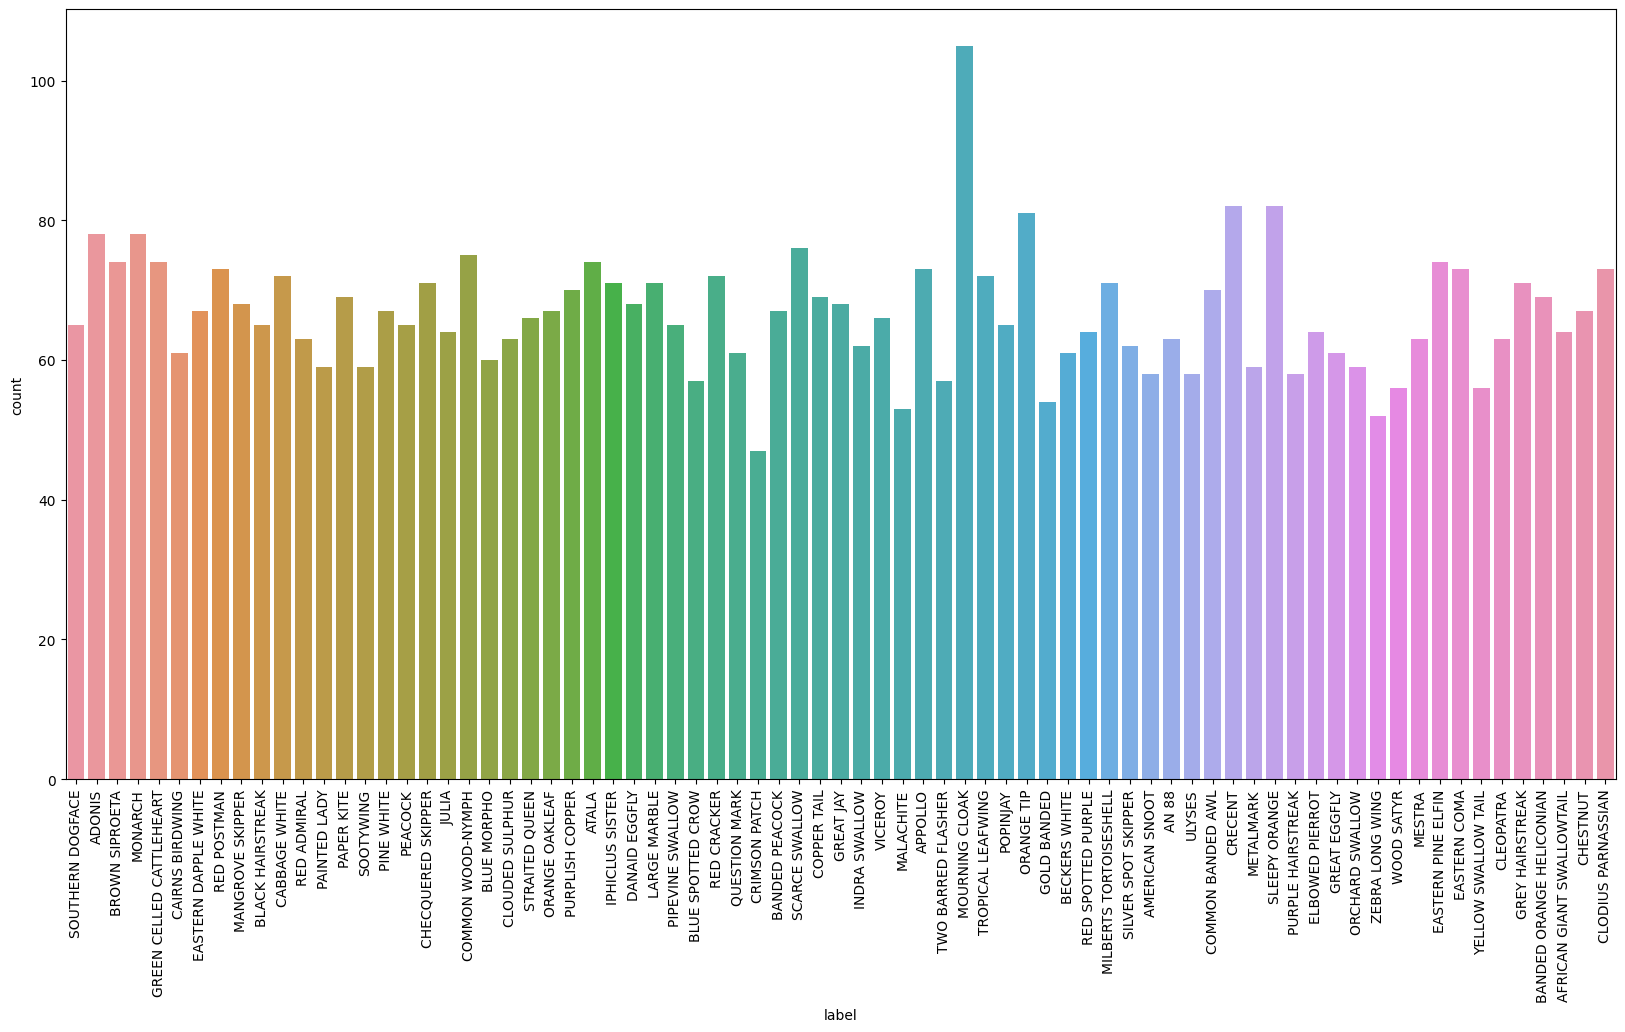

In [5]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.countplot(data=df, x='label')
plt.show()

In [6]:
df.describe()

,filename,label
count,5000,5000
unique,5000,75
top,Image_5000.jpg,MOURNING CLOAK
freq,1,105


In [7]:
image_size=(224,224)
batch_size=32

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

In [10]:
train_data = datagen.flow_from_dataframe(
    df,
    directory='/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/train/train',
    seed = 42,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 4000 validated image filenames belonging to 75 classes.


In [11]:
validation_data = datagen.flow_from_dataframe(
    df,
    directory='/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/train/train',
    seed = 42,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1000 validated image filenames belonging to 75 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
])

NUM_CLASSES = 75

## VGG16 architecture

In [13]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [15]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(224, 224, 3)),
    data_augmentation,
    conv_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │        38,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,598,731 (105.28 MB)

 Trainable params: 19,963,467 (76.15 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [16]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=3,
    restore_best_weights=True 
)


history = model.fit(
    train_data,
    epochs=25,
    validation_data=validation_data,
    callbacks=[early_stopping]
)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 267ms/step - accuracy: 0.0360 - loss: 4.3947 - val_accuracy: 0.1810 - val_loss: 3.7573
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.2006 - loss: 3.5028 - val_accuracy: 0.4100 - val_loss: 2.6374
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.3867 - loss: 2.5301 - val_accuracy: 0.5390 - val_loss: 1.9276
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.5272 - loss: 1.8623 - val_accuracy: 0.6370 - val_loss: 1.4693
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.6245 - loss: 1.4550 - val_accuracy: 0.7000 - val_loss: 1.2516
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.6745 - loss: 1.2281 - val_accuracy: 0.7240 - val_loss: 1.0841
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.7178 - loss: 1.0048 - val_accuracy: 0.7570 - val_loss: 0.9467
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.7774 - loss: 0.8552 - val

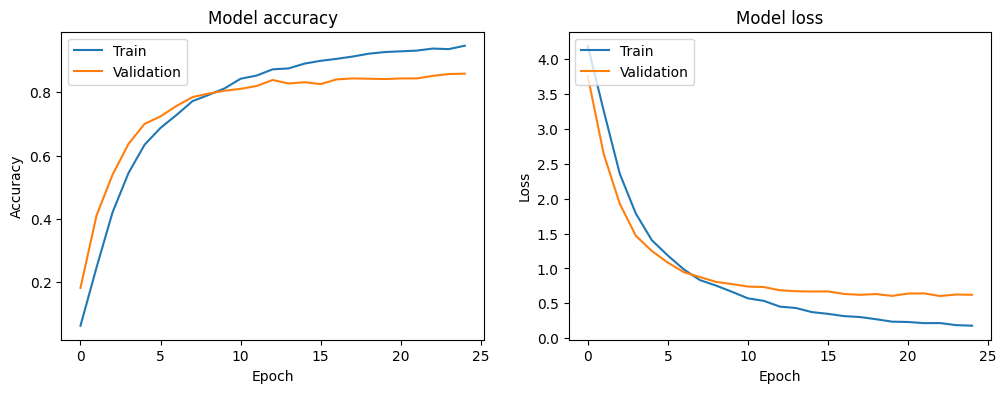

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(validation_data)
print(f"Test accuracy: {test_acc}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8618 - loss: 0.5883
Test accuracy: 0.8519999980926514


In [19]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the test directory and create ImageDataGenerator
test_dir = "/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/test"
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [20]:

# Create the test generator with the correct target_size
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Ensure target_size matches the input shape of your model
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 1499 images belonging to 1 classes.


In [21]:
# Perform predictions using the model
predictions = model.predict(test_generator, steps=len(test_generator))

# Assuming train_data is used for training and contains class indices
class_labels = list(train_data.class_indices.keys())

# Process predicted classes
predicted_classes = np.argmax(predictions, axis=1)
predicted_class_labels = [class_labels[i] for i in predicted_classes]

47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step


In [22]:
import pandas as pd

# Function to extract numerical part from filename
def extract_number(filename):
    return int(filename.split('_')[1].split('.')[0])

# Get filenames from test_generator
file_names = test_generator.filenames

# Create DataFrame with filenames and predicted labels
results_df = pd.DataFrame({
    'filename': file_names,
    'predicted_label': predicted_class_labels
})

# Extract filename without directory for clarity
results_df['filename'] = results_df['filename'].apply(lambda x: x.split('/')[-1])

# Sort the DataFrame by the numerical part of the filenames
results_df['file_num'] = results_df['filename'].apply(extract_number)
results_df.sort_values(by='file_num', inplace=True)

# Create the final DataFrame in the desired format with column names 'ID' and 'label'
final_df = results_df[['filename', 'predicted_label']].rename(columns={'filename': 'ID', 'predicted_label': 'label'})

# Save results to CSV file with headers
final_df.to_csv('Version7.3.csv', index=False, header=True)
